
# Project: Medical Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.  We'll be focused on finding the trends among patients who show up for their appointments and how they differ from those who do not show up, if there are any trends; including what characteristics make them more likely to show up, if there is a correlation?

The column names include a number of characteristics about the patients. These include:
* ‘ScheduledDay’: what day the patient set up their appointment.
* ‘Neighborhood’: the location of the hospital.
* ‘Scholarship’ : whether or not the patient is enrolled in the Brasilian welfare ([Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)) program.
* 'No-show': ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
* 'Gender'
* 'SMS_received': whether or not they received an SMS
* 'Age' : age of patients



### Question(s) for Analysis
1. Do people show up more for appointments on average?
2. Are certain characteristics associated with showing up or not showing up for appointments?





**To start:** We'll import the packages we need for the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
app_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') # loading the data
app_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Operations to inspect the data

In [3]:
# to get the dimensions of the dataset
app_df.shape 

(110527, 14)

110,527 patients/Rows and 14 Columns/characteristics

Some summary statistics to understand more about our data and identify any changes we'll have to make:

In [4]:
app_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



The majority age of people with appointments is between 18 to 55. Oldest age of patient is 115 while the youngest is less than a year old. The average age of patients seems to be around 37.


In [5]:
app_df.info() # checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values in this dataset.

In [6]:
app_df.duplicated().sum() # checking for duplicates

0

No duplicates in this dataset.

Before proceeding any further, we'll drop columns which won't be used for this analysis for clarity.

In [7]:
# dropping columns we won't be using for this analysis
app_df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Hipertension',  'Diabetes', 'Alcoholism', 'Handcap'],  axis=1, inplace=True)


In [8]:
app_df.head() # to confirm changes 

,Gender,Age,Scholarship,SMS_received,No-show
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,0,0,No


And rename some columns for uniformity

In [9]:
app_df.rename(columns = {'No-show': 'NoShow', 'SMS_received': 'SMSReceived'}, inplace=True)

In [10]:
app_df.head() # confirm changes

,Gender,Age,Scholarship,SMSReceived,NoShow
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis




### Overview of curated dataset.

A quick overview into relationships among numerical values.

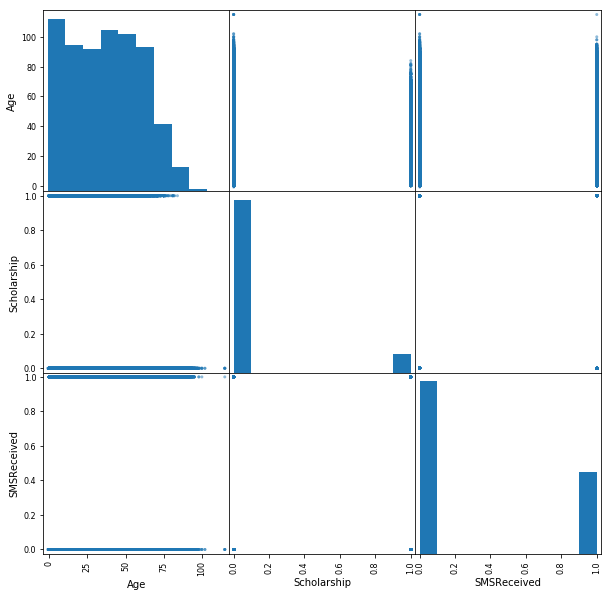

In [11]:
pd.plotting.scatter_matrix(app_df, figsize=(10,10));

Histograms of numeric columns

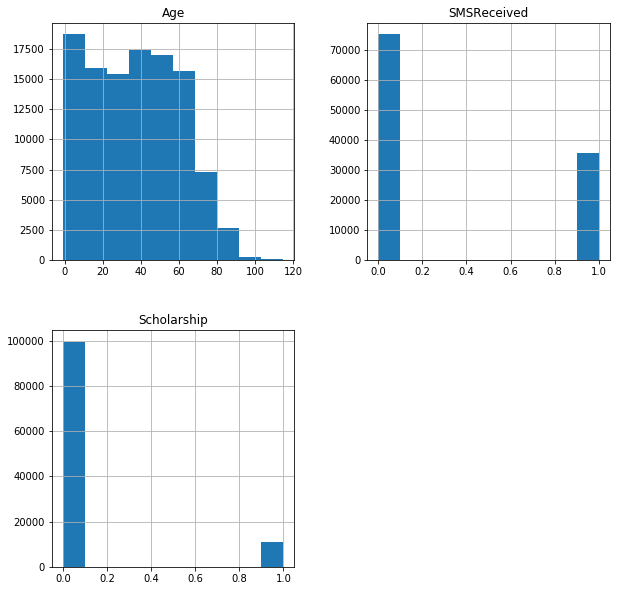

In [12]:
app_df.hist(figsize=(10,10));

From the histogram plots above, we can see that:
* Most patients are aged between 0 and 60 
* Most patients are not enrolled in the [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) program
* Fewer patients received an SMS notification than did not

### Research Question 1: Do people show up more for appointments on average?

Bar charts for non-numeric columns

In [13]:
# Defining a function that plots counts of columns
def patient_count_barplot(column):
    "Type in variable, column, which is column name in string format"
    app_df[column].value_counts().plot(kind='bar')
    plt.title('Distribution of {}'.format(column))
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Number of Patients', fontsize=15)
    plt.show();

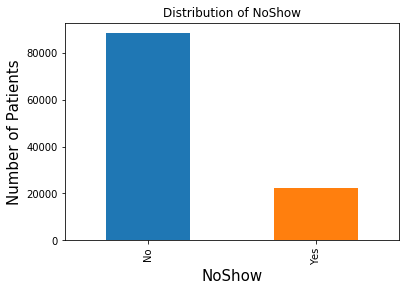

In [14]:
patient_count_barplot('NoShow') 

The *NoShow* column serves to indicate the patients who did not show up. Thus, a 
- "No" signifies that the patient showed up, and,
- "Yes" signifies that the patient **did not** show up

For the plot above, more people showed up for their appointments than did not. 

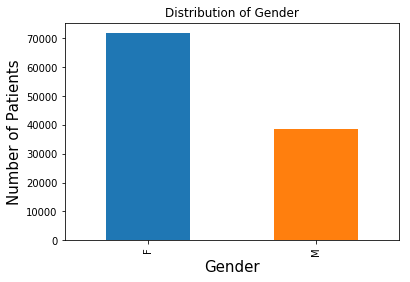

In [15]:
patient_count_barplot('Gender')

There are more female patients than there are male patients.

#### Creating masks for the NoShow column

Creating masks for rows where the patients showed up and rows where they did not.


- "No" : the patient showed up, and,
- "Yes" : the patient **did not** show up

In [16]:
# creating masks for the NoShow column 
showed_up = app_df.NoShow == 'No'  
did_not_show_up = app_df.NoShow == 'Yes'

> `showed_up` indicates the patients who showed up for their appointments.
>
> `did_not_show_up` indicates the patients who did not show up for their appointments.

In [17]:
showed_up.sum(), did_not_show_up.sum() # sum of patients who showed up vs. those who didn't

(88208, 22319)

**More patients showed up for their appointments than did not.** About 20% of patients who scheduled for appointments did not show up for those appointments.


## Summary statistics of working dataset

In [18]:
app_df.groupby('Gender').describe() # grouped by gender

Age                                                      \
          count       mean        std  min   25%   50%   75%    max   
Gender                                                                
F       71840.0  38.893987  22.155235 -1.0  21.0  39.0  56.0  115.0   
M       38687.0  33.736863  24.435221  0.0  10.0  33.0  54.0  100.0   

       SMSReceived           ...            Scholarship                      \
             count      mean ...   75%  max       count      mean       std   
Gender                       ...                                              
F          71840.0  0.336888 ...   1.0  1.0     71840.0  0.123232  0.328706   
M          38687.0  0.291571 ...   1.0  1.0     38687.0  0.051904  0.221836   

                                 
        min  25%  50%  75%  max  
Gender                           
F       0.0  0.0  0.0  0.0  1.0  
M       0.0  0.0  0.0  0.0  1.0  

[2 rows x 24 columns]


> *More females scheduled to have an appointment than males with the average age around 38 for females and 33 for males. There's at least one female baby scheduled for an appointment.*
>
> *On average, 33% of females received an SMS notification compared to 29% of males.*
>
> *12% of females were enrolled in the [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) program compared to about 5% of males on average.*


In [19]:
# Assigning df for patients who showed up
show = app_df[showed_up]
show.head() # checking to confirm changes

,Gender,Age,Scholarship,SMSReceived,NoShow
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,0,0,No


In [20]:
# Assigning df for patients who did not show up
not_show = app_df[did_not_show_up]
not_show.head() # checking to confirm changes

,Gender,Age,Scholarship,SMSReceived,NoShow
6,F,23,0,0,Yes
7,F,39,0,0,Yes
11,M,29,0,1,Yes
17,F,40,1,0,Yes
20,F,30,0,0,Yes


### Of those who ***`showed up`***
* By gender and age

In [21]:
show.groupby('Gender').describe()['Age'] # summary statistics of those who showed up

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,57246.0,39.590417,22.342862,-1.0,22.0,40.0,57.0,115.0
M,30962.0,34.461372,24.734056,0.0,10.0,34.0,55.0,100.0


 
*Of those who **showed up**, there were more females (**close to 200%** of the males). No male babies showed for an appointment.*

### Of those who ***`did not show up`***
* By gender and age

In [22]:
not_show.groupby('Gender').describe()['Age'] # summary statistic of those who did not showed up

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,14594.0,36.16219,21.184209,0.0,20.0,34.0,52.0,115.0
M,7725.0,30.83301,22.972200,0.0,10.0,28.0,49.0,97.0


*Of those who **did not show up**, there were also more females than males and there were no babies of either gender.*

### Research Question 2: Are certain characteristics associated with showing up or not showing up for appointments?

In [23]:
# Defining a function that plots columns and appointments
def appointment_plot(column):
    "Type in variable, column, which is the column name in string format"
    show[column].hist(alpha = 0.6, label='showed_up', color = 'b')
    not_show[column].hist(alpha = 0.9, label='did_not_show_up', color = 'orange')
    plt.title('{} vs. Appointments'.format(column))
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Frequency of Appointments', fontsize=15)
    plt.legend();

### *Age*

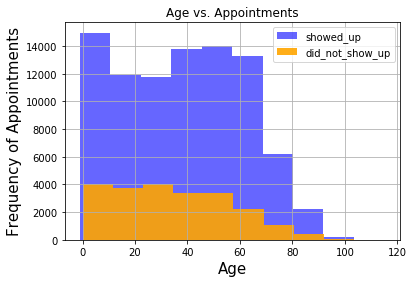

In [24]:
appointment_plot('Age')

*The age distribution shows that children from <1 to about 10 years old showed up more for their appointments than any other age groups. Older adults showed up the least.*

### *Gender* 

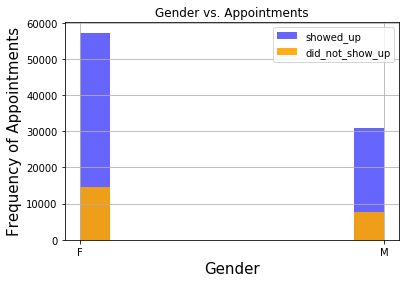

In [25]:
appointment_plot('Gender')

*Both groups have more female patients than males who scheduled to have an appointment. Female patients showed up more than the male patients to appointments.*

### *SMS Received*

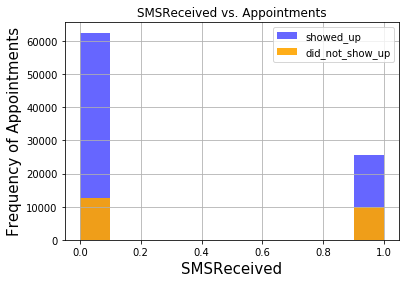

In [26]:
appointment_plot('SMSReceived')

*Most patients who showed up did not receive an SMS notification. Of those who received an SMS notification, about 70% showed up.*

### *Scholarship*

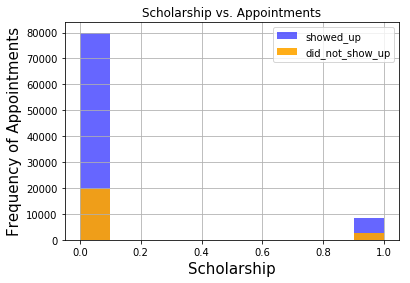

In [27]:
appointment_plot('Scholarship')

*Most patients who showed up for their appointments were not enrolled in the welfare program, [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).*

<a id='conclusions'></a>
## Conclusions



#### From the analysis above,

* ***More people showed up for medical appointments*** than did not. On average, most people were more likely to show up for appointments. 

* Of those who showed up, most were females. ***Females were more likely to schedule for appointments than males***.

* The ages of the patients ranged from <1 to 115 with the average age of patients around 37. ***Younger children showed up more than older adults*** for their appointments. 

* Most people who showed up for appointment were ***not enrolled in the welfare Program, [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)***.

* Of those who showed up for appointments, majority of them were not notified via SMS compared to those who did not show up.

* Health challenges such as Hypertension, Diabetes, Alcoholism and Handicaps did not seem play any signifacant role in predicting whether a patient showed up or not.

This analysis was done using only Descriptive Statistics and so has its limitations. Therefore, it is unclear whether the location of the hospital or the health challenges of patients or the scheduled and appointment dates could have influenced "showability" of patients in some way using other in-depth methods beyond just Descriptive Analysis.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0